

# Natural Language Processing (NLP) with Python


 SMS Spam Collection Data Set(https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection). The dataset is a public set of SMS labeled messages that have been collected for mobile phone spam research. The dataset is a part of [UCI repository](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) and was donated for public use in 2012. This  dataset contain over 5000 instances .  

**Required libraries:**<br> 
In order to work with NLP, we need to have Python's [NLTK (Natural Language Toolkit)](https://www.nltk.org) installed 
along with  Scikit-learn.

In [16]:
import nltk

In [17]:
sms = [line for line in open('SMSSpamCollection')]

In [18]:
len(sms), type(sms)

(5574, list)

We have 5574 messages in the corpus, we can check any message e.g. for 2 sms[1]. 

In [19]:
#First look at sms
sms[1]

'ham\tOk lar... Joking wif u oni...\n'

In [20]:

import pandas as pd

In [21]:

df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                names=['target', 'sms'])
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
target    5572 non-null object
sms       5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [23]:
df.describe()

,target,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [24]:
df.groupby('target').describe()

sms                                                               
       count unique                                                top freq
target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4




## Feature Engineering


In [25]:
df['length'] = df['sms'].apply(len)
df.head()

,target,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Visualization 


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

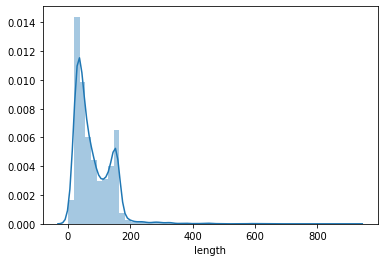

In [27]:

sns.distplot(df['length'])

We can clearly see a bimodal distribution in the length column. Looks like, the choice of the length of the message during feature engineering was a good option.<br>
exploring more, ploting ham and spam separately

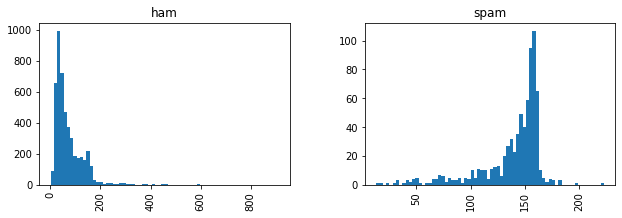

In [28]:
df.hist(column='length', by='target', bins=70,figsize=(10,3));


## Text Preprocessing 


In [29]:

import string




 joining the characters again at '' (white space) to form the string.

#### Removing stop-words.


In [31]:
# do the import for stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords
# Just to see first 5 English stopwords
stopwords.words('english')[0:5] 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shaivya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we']

In [32]:
def process_text(raw_text):
    # Check for the punctuations 
    nopunc = [char for char in raw_text 
              if char not in string.punctuation]

    # Join the characters 
    nopunc = ''.join(nopunc)
    
    # Remove stopwords (if any)
    return [word for word in nopunc.split() 
            if word.lower() not in stopwords.words('english')]

### Tokenization


In [33]:
#Before tokenization
df['sms'].head(2)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
Name: sms, dtype: object

In [34]:
#After tokenization
df['sms'].head(2).apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
Name: sms, dtype: object

In [35]:
#tokenization on df['sms']
df['sms'].apply(process_text);
df

,target,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


### Vectorization


In [36]:
#Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
bow_transformer = CountVectorizer(
    analyzer=process_text).fit(df['sms'])

In [38]:
# How many words we got in the vocabulary?
print(len(bow_transformer.vocabulary_))

11425


In [40]:
#type(bow_transformer.vocabulary_)#['way'] #to get the word's id 
bow_transformer.vocabulary_.get('way') #to get the word's id / index 
df

,target,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [41]:
# grabbing message at index 18 -- 19th message (index starts at 0)
sms_18 = df['sms'][18]

#Transforming sms_18 to its bow (bow_18)
bow_18 = bow_transformer.transform([sms_18])

# how the bow_18 look like and what is its shape, let's check 
print(bow_18)
print(bow_18.shape) #(n_rows, n_cols) -- shape is 1 by our entire vocabulary

  (0, 1914)	1
  (0, 3964)	1
  (0, 4880)	1
  (0, 6517)	1
  (0, 6907)	1
  (0, 10405)	1
  (0, 10698)	1
  (0, 10979)	2
(1, 11425)


In [42]:
print(bow_transformer.get_feature_names()[10979])

way


In [43]:
df_bow = bow_transformer.transform(df['sms'])

 Shape of the df_bow matrix 

In [44]:
print('Shape of matrix of token counts(sms_bow): ', df_bow.shape) # (n_rows, n_cols)
print('No of Non-Zero elements: ', df_bow.nnz)

Shape of matrix of token counts(sms_bow):  (5572, 11425)
No of Non-Zero elements:  50548


 sparsity of the matrix 

In [45]:
total_no_of_elements = df_bow.shape[0] * df_bow.shape[1]
sparsity = (df_bow.nnz / total_no_of_elements)*100
print('sparsity of df_bow matrix: {}' .format(sparsity))

sparsity of df_bow matrix: 0.07940295412668218


In [46]:
# Doing import 
from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
# Let's create an instance for TfidfTransformer and fit to the df_bow
tfidf_trans = TfidfTransformer()
tfidf_trans.fit(df_bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

As previously done, for better understanding, **lets work with a single message "sms_18" and transform "bow_18" to tfidf.** 

In [54]:
tfidf_18 = tfidf_trans.transform(bow_18)
#lets print TF-IDF for the message 18
print(tfidf_18)

  (0, 10979)	0.4614287912715437
  (0, 10698)	0.14951677306049
  (0, 10405)	0.407177880883951
  (0, 6907)	0.407177880883951
  (0, 6517)	0.25779365112759217
  (0, 4880)	0.2595470847416778
  (0, 3964)	0.407177880883951
  (0, 1914)	0.3654100017189274


In [55]:
print('IDF for "Way" is: ',tfidf_trans.idf_[bow_transformer.vocabulary_['way']])

IDF for "Way" is:  5.0613405961017


Now, we got better idea on weighting, lets transfer our entire BoW "sms_bow" to TF-IDF corpus! <br>
*Instead of passing a single sms as a BoW, we will pass the entire corpus.* 

In [56]:
df_tfidf = tfidf_trans.transform(df_bow)

In [57]:
# Let's check the shape of sms_tfidf
df_tfidf.shape


(5572, 11425)

In [58]:
test=df_tfidf[1:2000][:]
print(test.shape)

(1999, 11425)


## Machine Learning -- Training and evaluating the model  


In [59]:

from sklearn.naive_bayes import MultinomialNB

In [60]:

spam_ham_detection = MultinomialNB()
print(df_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

In [61]:

from sklearn.model_selection import train_test_split 
X = df_tfidf
y = df['target']


In [62]:
X_train, X_test, y_train, X_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [63]:

spam_ham_detection.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [68]:
# predictions for the test data
pred = spam_ham_detection.predict(X_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))

[[1593    0]
 [  71  175]]
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.71      0.83       246

    accuracy                           0.96      1839
   macro avg       0.98      0.86      0.90      1839
weighted avg       0.96      0.96      0.96      1839

